In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def euclidean_distance(point1, point2):
    # np.linalg.norm = Euclidean norm -> sqrt(x^2 + y^2)
    # subtraction of the np arrays is element-wise
    # ex. point1 = (x1, y1) point2 = (x2, y2) so result is [x1-x2, y1-y2]
    return np.linalg.norm(np.array(point1) - np.array(point2))

# |x1 - x2|+|y1 - y2|....
def manhattan_distance(vector1, vector2):
    return sum(abs(x - y) for x, y in zip(vector1, vector2))

def calculate_accuracy_and_generalization_error(predictions, truths):
    if len(predictions) != len(truths):
        raise ValueError("Vectors must be of the same length.")

    total_elements = len(predictions)
    correct_predictions = sum(1 for pred, truth in zip(predictions, truths) if pred == truth)

    accuracy = correct_predictions / total_elements
    generalization_error = 1 - accuracy

    return accuracy, generalization_error

def precision(predictions, truths):
    true_positives = sum(1 for pred, truth in zip(predictions, truths) if pred == 1 and truth == 1)
    false_positives = sum(1 for pred, truth in zip(predictions, truths) if pred == 1 and truth == 0)
    # identify correct positives observed
    if true_positives + false_positives == 0:
        return 0  # To avoid division by zero
    else:
        return true_positives / (true_positives + false_positives)

def recall(predictions, truths):
    true_positives = sum(1 for pred, truth in zip(predictions, truths) if pred == 1 and truth == 1)
    false_negatives = sum(1 for pred, truth in zip(predictions, truths) if pred == 0 and truth == 1)
    # the proportion of actual positive samples that were correctly identified by the model
    if true_positives + false_negatives == 0:
        return 0  # To avoid division by zero
    else:
        return true_positives / (true_positives + false_negatives)

def f1_score(predictions, truths):
    prec = precision(predictions, truths)
    rec = recall(predictions, truths)
    # measures the models accuracy considering both precision and recall
    if prec + rec == 0:
        return 0  # To avoid division by zero
    else:
        return 2 * (prec * rec) / (prec + rec)

def confusion_matrix(predictions, truths):
    true_positives = sum(1 for pred, truth in zip(predictions, truths) if pred == 1 and truth == 1)
    false_positives = sum(1 for pred, truth in zip(predictions, truths) if pred == 1 and truth == 0)
    true_negatives = sum(1 for pred, truth in zip(predictions, truths) if pred == 0 and truth == 0)
    false_negatives = sum(1 for pred, truth in zip(predictions, truths) if pred == 0 and truth == 1)

    return np.array([true_positives, false_positives, true_negatives, false_negatives])

def tfRates(predictions, truths):
    true_positives, false_positives, true_negatives, false_negatives = confusion_matrix(predictions, truths)

    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)

    return fpr, tpr

def generate_roc_curve(predictions, truths):

    fpr_list = []
    tpr_list = []

    # Iterate over different thresholds
    thresholds = sorted(set(predictions), reverse=True)
    for threshold in thresholds:

        binary_predictions = [1 if pred >= threshold else 0 for pred in predictions]

        # Calculate FPR and TPR for each threshold
        fpr, tpr = tfRates(binary_predictions, truths)

        fpr_list.append(fpr)
        tpr_list.append(tpr)

    # We want the ROC curve start at the origin and end at the top-right corner
    fpr_list = [0] + fpr_list + [1]
    tpr_list = [0] + tpr_list + [1]


    # Plot ROC curve
    '''
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_list, tpr_list, marker='o', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid(True)
    plt.show()
    '''

    return fpr_list, tpr_list

def auc(fpr, tpr):
    # Generate ROC curve
    fpr, tpr = generate_roc_curve(predictions, truths)

    '''
    numpy has function for trapezoidal rule that calculates definite integral
    to approximate area under curve np.trapz

    '''
    auc_value = np.trapz(tpr, fpr)

    return auc_value

def precision_recall_curve(predictions, truths):

    precision_list = []
    recall_list = []

    # Iterate over different thresholds
    thresholds = sorted(set(predictions), reverse=True)
    for threshold in thresholds:

        binary_predictions = [1 if pred >= threshold else 0 for pred in predictions]

        # Calculate precision and recall for each threshold
        prec = precision(binary_predictions, truths)
        rec = recall(binary_predictions, truths)

        precision_list.append(prec)
        recall_list.append(rec)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_list, precision_list, marker='o', linestyle='-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

    return precision_list, recall_list


In [2]:
# Example usage:
vector1 = [1, 2, 3]
vector2 = [4, 5, 6]
distance = manhattan_distance(vector1, vector2)
print("Manhattan distance between", vector1, "and", vector2, "is", distance)


point1 = [1, 2, 3]
point2 = [4, 5, 6]
distance = euclidean_distance(point1, point2)
print("Euclidean distance between", point1, "and", point2, "is", distance)

# Example usage:
predictions = [1, 0, 1, 1, 0]
truths = [1, 1, 0, 1, 0]

accuracy, generalization_error = calculate_accuracy_and_generalization_error(predictions, truths)
print("Accuracy:", accuracy)
print("Generalization Error:", generalization_error)

# Example usage:
predictions = [0.8, 0.7, 0.6, 0.4, 0.2, 0.1]
truths = [1, 1, 0, 1, 0, 0]
fpr, tpr = generate_roc_curve(predictions, truths)
auc_value = auc(tpr, fpr)
print(f'Area Under Curve (AUC): {auc_value}')


Manhattan distance between [1, 2, 3] and [4, 5, 6] is 9
Euclidean distance between [1, 2, 3] and [4, 5, 6] is 5.196152422706632
Accuracy: 0.6
Generalization Error: 0.4
Area Under Curve (AUC): 0.888888888888889


In [3]:
class KNN_Classifier:
    def __init__(self):
        self.X_train = None
        self.Y_train = None
        self.n_neighbors = None
        self.weights = None
        self.distance_metric = None

    def fit(self, X, Y, n_neighbors, weights='uniform', distance_metric='euclidean', **kwargs):

        self.X_train = X # features
        self.Y_train = Y # target
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance_metric = distance_metric

    def predict(self, X):

        predictions = []

        for sample in X:
            # Same methods to calculate as functions above
            if self.distance_metric == 'euclidean':
                distances = np.linalg.norm(self.X_train - sample, axis=1)
            elif self.distance_metric == 'manhattan':
                distances = np.sum(np.abs(self.X_train - sample), axis=1)
            else:
                raise ValueError("Invalid distance metric. Supported metrics: 'euclidean', 'manhattan'.")

            sorted_indices = np.argsort(distances)

            '''
            If the weights is 'uniform', nearest neighbors are determined based
            on the sorted indices, retrieves their corresponding
            labels, and finds the most common label among them. If the weights
            is 'distance', it computes the inverse distances of the nearest
            neighbors and uses these inverse distances as weights when
            determining the most common label.
            '''

            if self.weights == 'uniform':
                nearest_indices = sorted_indices[:self.n_neighbors]
                nearest_labels = self.Y_train[nearest_indices]
                unique_labels, counts = np.unique(nearest_labels, return_counts=True)
                prediction = unique_labels[np.argmax(counts)]
            elif self.weights == 'distance':
                inverse_distances = 1 / distances[sorted_indices[:self.n_neighbors]]
                nearest_labels = self.Y_train[sorted_indices[:self.n_neighbors]]
                weighted_votes = np.zeros(max(self.Y_train) + 1)
                for i, label in enumerate(nearest_labels):
                    weighted_votes[label] += inverse_distances[i]
                prediction = np.argmax(weighted_votes)

            predictions.append(prediction)

        return np.array(predictions).reshape(-1, 1)

## **`Data Processing`**

In [4]:
file = 'winequality-white.csv'
wine_data = pd.DataFrame(pd.read_csv(file, sep=';'))
wine_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
def categorize_quality(quality):
    if quality > 5:
        return 1  # Good quality wine
    else:
        return 0  # Bad quality wine

# Apply the categorize_quality function to the "quality" column to create the target vector
wine_data['quality'] = wine_data['quality'].apply(categorize_quality)

# Display the modified DataFrame
wine_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [6]:
# numpy method for calculating mean
mean = np.mean(wine_data)
mean

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   0.665169
dtype: float64

In [7]:
# numpy method for calculating std
std = np.std(wine_data)
std

fixed acidity            0.843782
volatile acidity         0.100784
citric acid              0.121007
residual sugar           5.071540
chlorides                0.021846
free sulfur dioxide     17.005401
total sulfur dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
quality                  0.471931
dtype: float64

In [8]:
# method for quartiles through panda library
quartiles = wine_data.quantile([0.25, 0.5, 0.75])

quartiles

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.25,6.3,0.21,0.27,1.7,0.036,23.0,108.0,0.991723,3.09,0.41,9.5,0.0
0.50,6.8,0.26,0.32,5.2,0.043,34.0,134.0,0.993740,3.18,0.47,10.4,1.0
0.75,7.3,0.32,0.39,9.9,0.050,46.0,167.0,0.996100,3.28,0.55,11.4,1.0


In [9]:
shuffle = wine_data.sample(frac=1)
shuffle

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1954,8.0,0.25,0.13,17.20,0.036,49.0,219.0,0.99960,2.96,0.46,9.7,0
2079,7.4,0.45,0.32,7.10,0.044,17.0,117.0,0.99620,3.32,0.41,10.4,0
3650,6.9,0.19,0.60,4.00,0.037,6.0,122.0,0.99255,2.92,0.59,10.4,0
1707,6.8,0.26,0.29,16.95,0.056,48.0,179.0,0.99980,3.45,0.40,9.6,0
253,5.8,0.24,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2811,7.4,0.30,0.32,1.70,0.030,23.0,128.0,0.99290,3.17,0.66,10.9,0
1956,7.2,0.15,0.33,1.10,0.027,16.0,63.0,0.99370,3.37,0.40,9.9,0
3108,7.6,0.35,0.46,14.70,0.047,33.0,151.0,0.99709,3.03,0.53,10.3,0
4837,6.5,0.28,0.38,7.80,0.031,54.0,216.0,0.99154,3.03,0.42,13.1,1


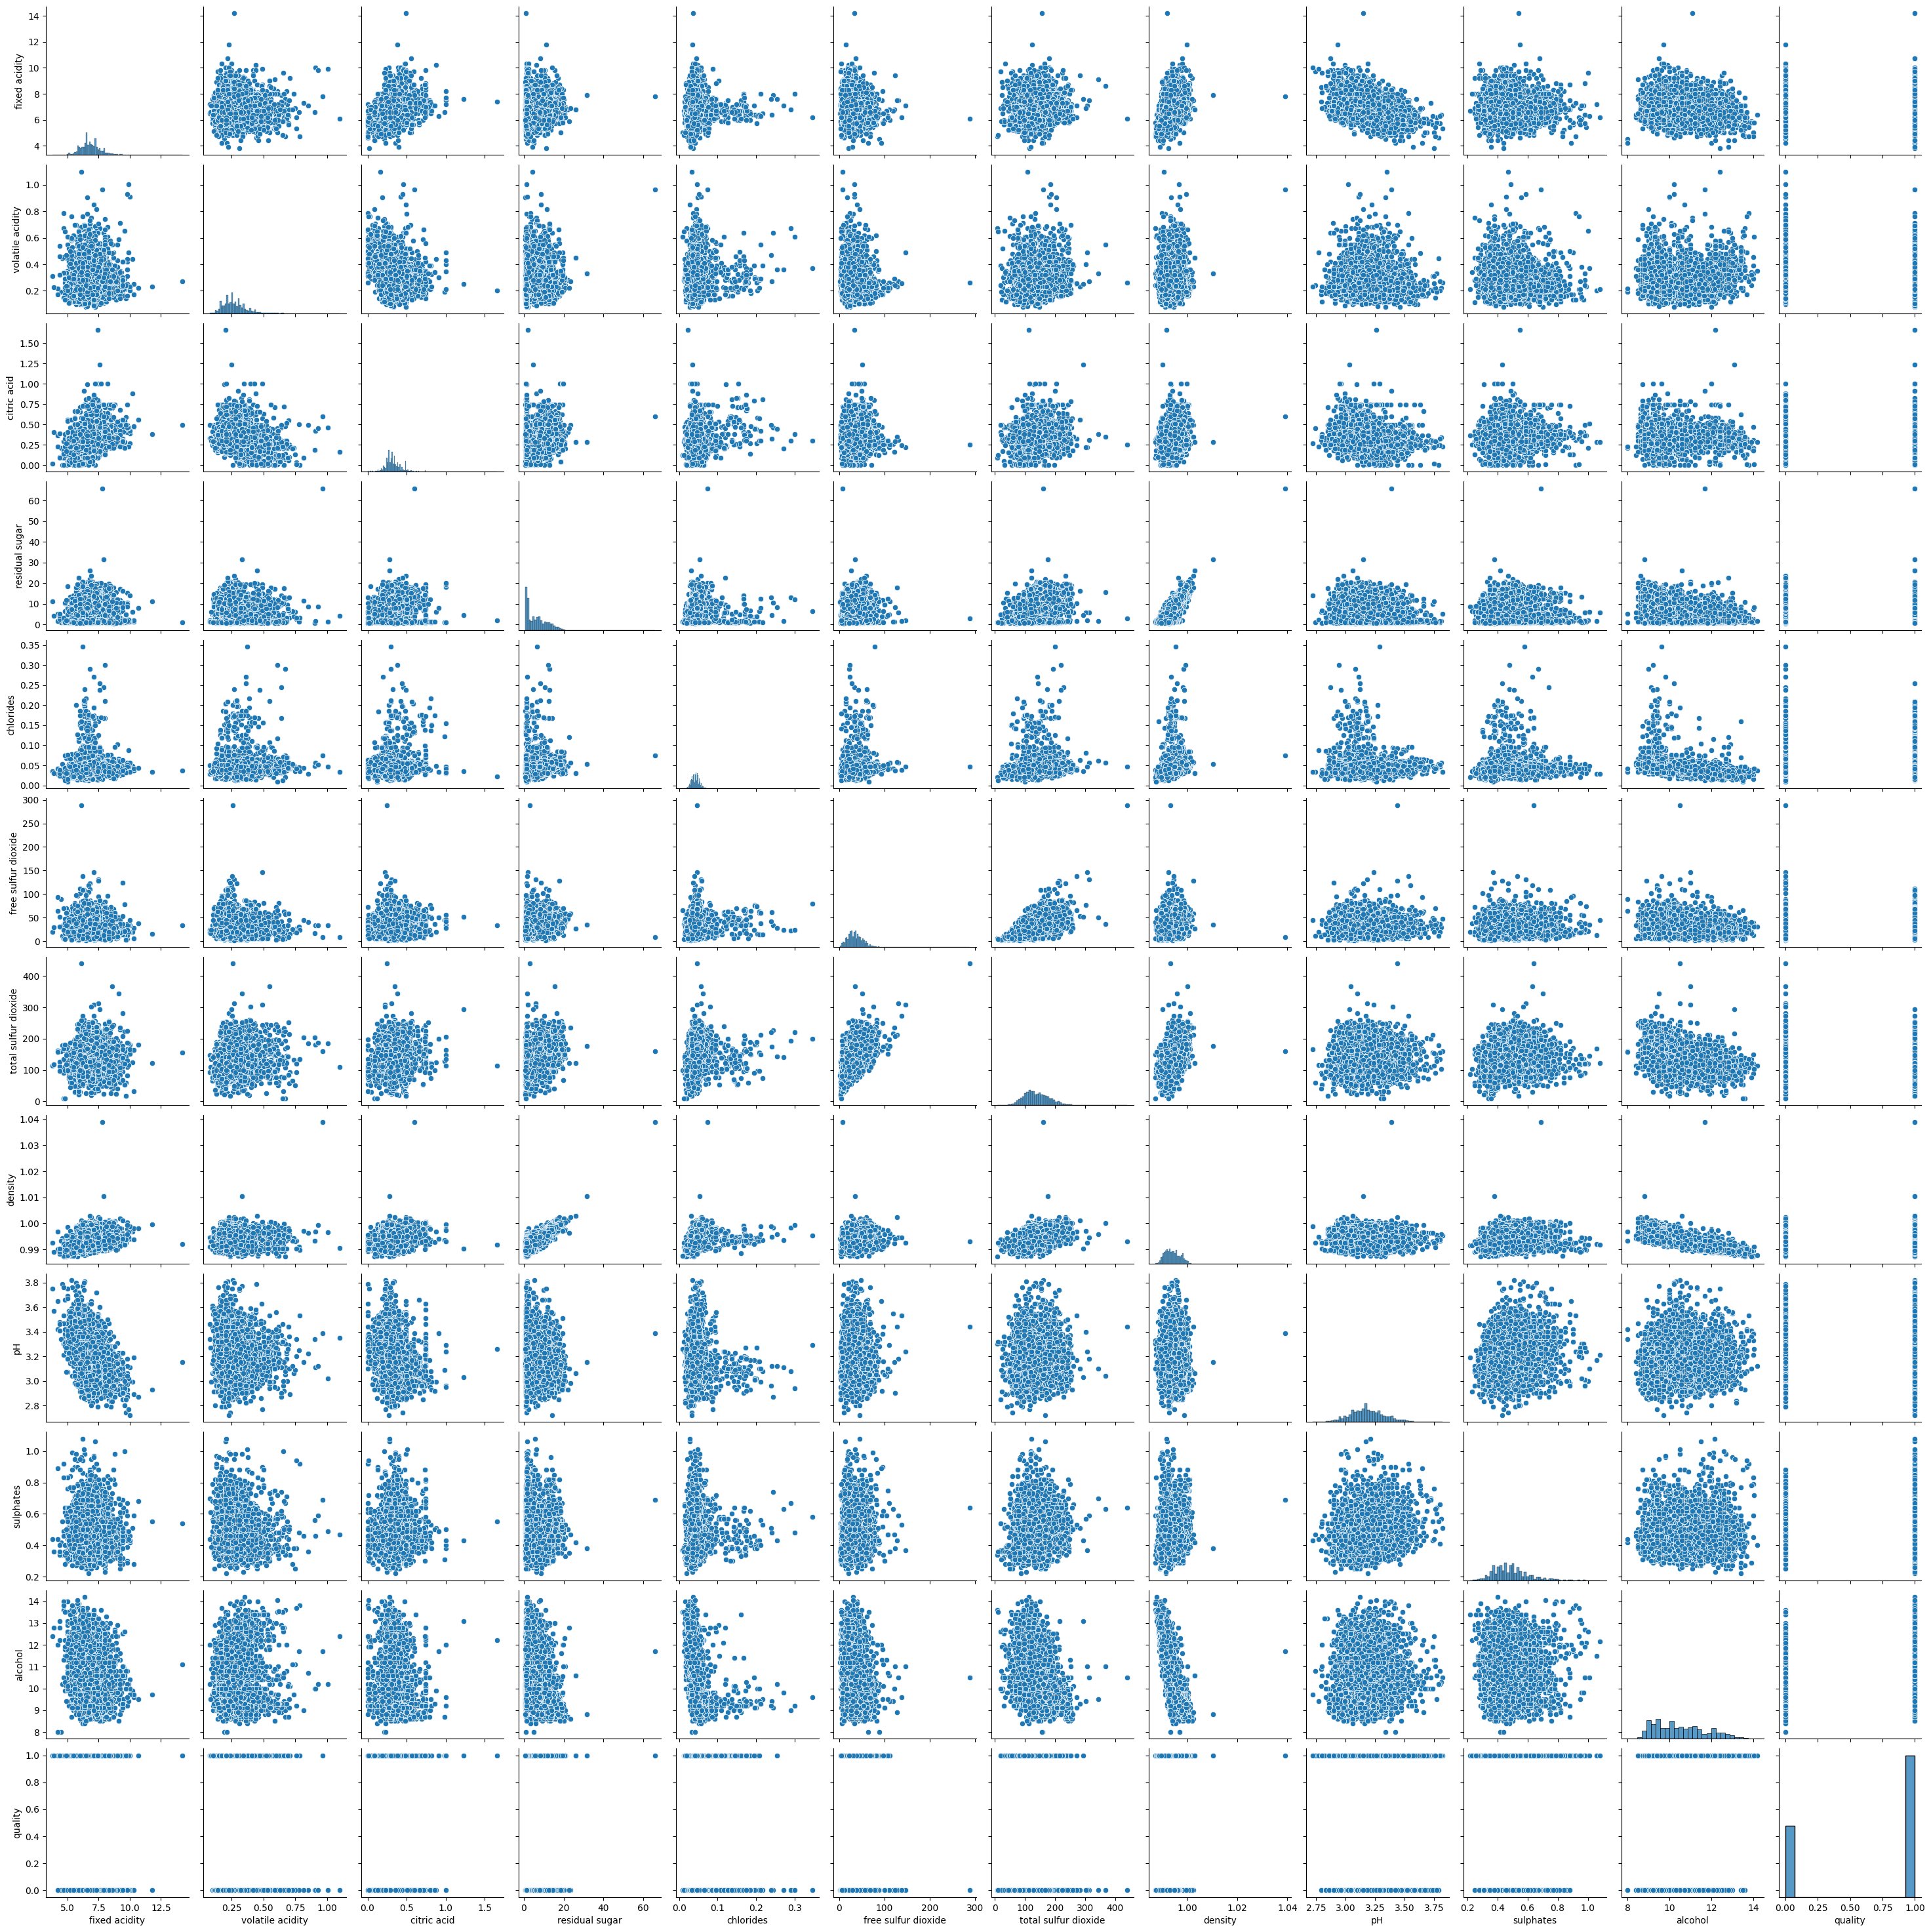

In [10]:
import seaborn as sns

sns.pairplot(wine_data)
plt.show()

Analysis of Plots Does Not Clearly Indicate Redundancies
We Can Use Correlation Analysis to Further Analyze

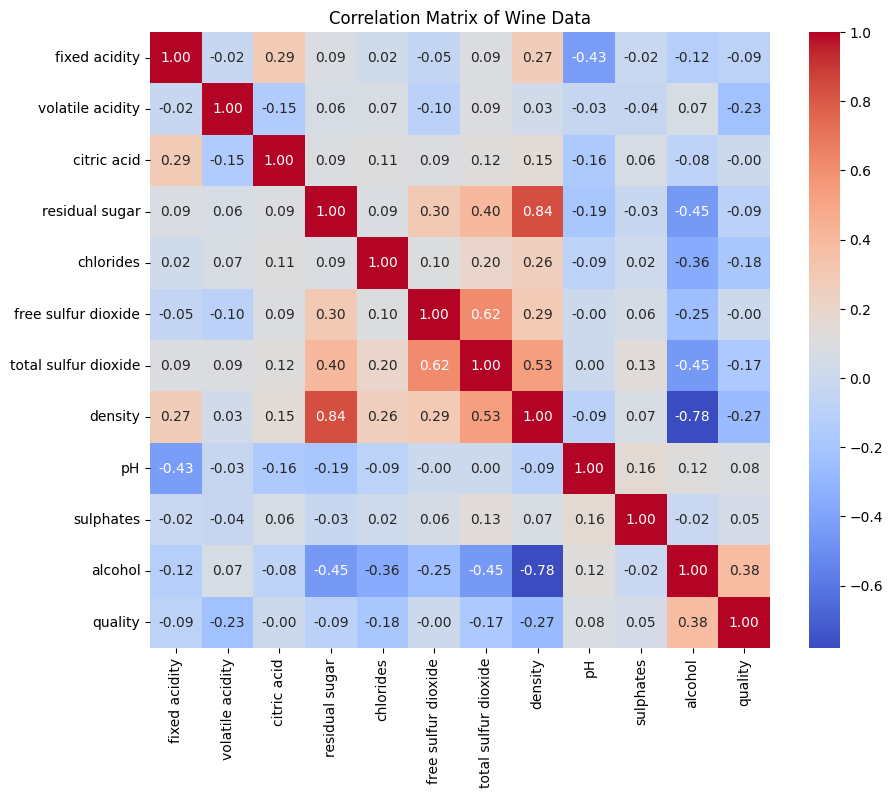

In [11]:
correlation_matrix = wine_data.corr()

# Visualize the correlation matrix as a heatmap
# Research on seaborn package revealed it
# contains features to simplify correlation like heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Data')
plt.show()

In [12]:
# Based on heatmap above, we can see there is high correlation between density
# and residual sugar features at 0.84 so we can remove one
wine_data.drop(columns=['residual sugar'], inplace=True)
wine_data

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [13]:
import math
'''
 for partition function we require the number of samples so that we could
 compute samples used for testing and training by taking a % of total samples
 we could use len() to get length of matrix for # of samples
 data is numpy array so we could use .shape() to return tuple of array
 dimensions ex. array = [ [1, 2, 3], [2, 3, 4] ] array.shape() -> (2, 3)
'''

def partition (feature_matrix, target_vector, t):
  total_samples = feature_matrix.shape[0] # take num of rows from the tuple
  training_samples = math.floor(total_samples * t)

  training_features = feature_matrix[:training_samples]
  test_features = feature_matrix[training_samples:]
  training_targets = target_vector[:training_samples]
  test_targets = target_vector[training_samples:]

  return training_features, test_features, training_targets, test_targets




In [14]:
# Make sure we use shuffled data for testing
shuffle = wine_data.sample(frac=1)

# Data is of type panda DataFrame so we use .values to return a numpy array
ex_features = shuffle.loc[:, shuffle.columns[:-1]].values
ex_labels = shuffle.loc[:, shuffle.columns[-1:]].values

# 80% of data for training
t = 0.8

train_features, test_features, train_target, test_target = partition(ex_features, ex_labels, t)


In [15]:
train_features

array([[ 6.4 ,  0.25,  0.33, ...,  3.19,  0.48, 11.3 ],
       [ 7.8 ,  0.26,  0.74, ...,  3.22,  0.64, 10.  ],
       [ 6.2 ,  0.47,  0.19, ...,  3.22,  0.45, 12.3 ],
       ...,
       [ 5.4 ,  0.18,  0.24, ...,  3.42,  0.4 ,  9.4 ],
       [ 7.6 ,  0.23,  0.34, ...,  3.12,  0.7 , 10.4 ],
       [ 6.  ,  0.26,  0.5 , ...,  3.08,  0.61,  9.8 ]])

In [16]:
test_features

array([[ 6.8 ,  0.21,  0.74, ...,  3.13,  0.41, 10.7 ],
       [ 8.1 ,  0.33,  0.22, ...,  3.22,  0.47, 10.3 ],
       [ 6.6 ,  0.56,  0.15, ...,  3.28,  0.52,  9.4 ],
       ...,
       [ 6.7 ,  0.46,  0.18, ...,  3.08,  0.44, 12.6 ],
       [ 7.6 ,  0.31,  0.27, ...,  3.08,  0.38, 11.  ],
       [ 6.4 ,  0.25,  0.3 , ...,  3.14,  0.49,  9.6 ]])

In [17]:
train_target

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [18]:
test_target

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [19]:
# First test before data is standardized

knn = KNN_Classifier()
knn.fit(train_features, train_target, 5, "uniform", "euclidean")
p = knn.predict(test_features)

In [20]:
cm = confusion_matrix(p, test_target)
cm

array([520, 183, 162, 115])

In [21]:
pre = precision(p, test_target)
pre

0.7396870554765291

In [22]:
r = recall(p, test_target)
r

0.8188976377952756

In [23]:
F1 = f1_score(p, test_target)
F1

0.7772795216741405

In [24]:
Acc = calculate_accuracy_and_generalization_error(p, test_target)
print(f'Accuracy: {Acc[0]}\nGeneralization Error: {Acc[1]}')

Accuracy: 0.6959183673469388
Generalization Error: 0.3040816326530612


In [25]:
# Compute mean and standard deviation for each feature in the training set
means = np.mean(train_features, axis=0)
stds = np.std(train_features, axis=0)

# Standardize the training set
train_features_standardized = (train_features - means) / stds

# Standardize the test set using the mean and standard deviation from the training set
test_features_standardized = (test_features - means) / stds

print(f'{train_features_standardized}\n\n{test_features_standardized}\n')

[[-0.5335889  -0.28169949 -0.03011482 ...  0.00471744 -0.08789793
   0.63824453]
 [ 1.15393523 -0.18149079  3.3646818  ...  0.20345858  1.31667642
  -0.42149464]
 [-0.77466378  1.9228919  -1.18931367 ...  0.20345858 -0.35125562
   1.4534285 ]
 ...
 [-1.73896328 -0.98316039 -0.77531408 ...  1.52839952 -0.7901851
  -0.91060502]
 [ 0.91286035 -0.48211689  0.05268509 ... -0.45901189  1.8433918
  -0.09542105]
 [-1.01573866 -0.18149079  1.37748378 ... -0.72400008  1.05331873
  -0.58453143]]

[[-5.14391517e-02 -6.82534293e-01  3.36468180e+00 ... -3.92764843e-01
  -7.02399202e-01  1.49134142e-01]
 [ 1.51554754e+00  5.19970103e-01 -9.40913918e-01 ...  2.03458580e-01
  -1.75683822e-01 -1.76939447e-01]
 [-2.92514028e-01  2.82477020e+00 -1.52051334e+00 ...  6.00940863e-01
   2.63245661e-01 -9.10605024e-01]
 ...
 [-1.71976590e-01  1.82268320e+00 -1.27211359e+00 ... -7.24000079e-01
  -4.39041512e-01  1.69798369e+00]
 [ 9.12860352e-01  3.19552704e-01 -5.26914330e-01 ... -7.24000079e-01
  -9.65756892e

In [26]:
# Testing using the standardized data

standardKnn = KNN_Classifier()
standardKnn.fit(train_features_standardized, train_target, 5, "uniform", "euclidean")
standardP = standardKnn.predict(test_features_standardized)

In [27]:
standardCM = confusion_matrix(standardP, test_target)
standardCM

array([537, 140, 205,  98])

In [28]:
standardPre = precision(standardP, test_target)
standardPre

0.793205317577548

In [29]:
standardRe = recall(standardP, test_target)
standardRe

0.8456692913385827

In [30]:
standardF1 = f1_score(standardP, test_target)
standardF1

0.8185975609756098

In [31]:
standardAcc = calculate_accuracy_and_generalization_error(standardP, test_target)
print(f'Standardized Accuracy: {standardAcc[0]}\nStandardized Generalization Error: {standardAcc[1]}')

Standardized Accuracy: 0.7571428571428571
Standardized Generalization Error: 0.24285714285714288


# The Accuracy is slightly higher for the standardized data so we will choose to proceed with the standardized data for the remainder of the assignment.

In [32]:
# Next test with inverse distance weighting

weighting = KNN_Classifier()
weighting.fit(train_features_standardized, train_target, 5, "distance", "euclidean")
weightingP = weighting.predict(test_features_standardized)

<ipython-input-3-9a7703e62968>:47: RuntimeWarning: divide by zero encountered in divide
  inverse_distances = 1 / distances[sorted_indices[:self.n_neighbors]]


In [33]:
weightingCM = confusion_matrix(weightingP, test_target)
print(f'Confusion Matrix: {weightingCM}\nPrecision: {precision(weightingP, test_target)}')
print(f'Recall: {recall(weightingP, test_target)}\nF1: {f1_score(weightingP, test_target)}')
print(f'Accuracy & Generalization Error: {calculate_accuracy_and_generalization_error(weightingP, test_target)}')

Confusion Matrix: [557 110 235  78]
Precision: 0.8350824587706147
Recall: 0.8771653543307086
F1: 0.8556067588325653
Accuracy & Generalization Error: (0.8081632653061225, 0.19183673469387752)


# After testing for inverse distance weighting, it is clear that we obtained higher precision and accuracy than prior so this is a good method to use.

In [34]:
'''
Constructing a loop to test using standardized data for
k = 1,5,9,11
both distance methods
both weight methods
stores all statistics measured and returns all results at the end
'''

klist = [1, 5, 9, 11]
distances = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

# Initialize lists to store results
results = []

# Iterate over each combination of parameters
for k in klist:
    for distance_metric in distances:
        for weight in weights:
            # Train the model
            newKnn = KNN_Classifier()
            newKnn.fit(train_features_standardized, train_target, k, weight, distance_metric)

            # Predict labels
            predictions = newKnn.predict(test_features_standardized)

            # Calculate accuracy and F1 score
            accuracy_result, generalization_result = calculate_accuracy_and_generalization_error(predictions, test_target)
            f1_result = f1_score(predictions, test_target)
            confusion_result = confusion_matrix(predictions, test_target)
            precision_result = precision(predictions, test_target)
            recall_result = recall(predictions, test_target)

            # Store results
            results.append({'k': k, 'distance metric': distance_metric, 'weight': weight, 'accuracy': accuracy_result, 'f1_score': f1_result, 'confusion matrix': confusion_result, 'precision': precision_result, 'recall': recall_result})

# Display results
for result in results:
    print(result)

<ipython-input-3-9a7703e62968>:47: RuntimeWarning: divide by zero encountered in divide
  inverse_distances = 1 / distances[sorted_indices[:self.n_neighbors]]


{'k': 1, 'distance metric': 'euclidean', 'weight': 'uniform', 'accuracy': 0.7959183673469388, 'f1_score': 0.84399375975039, 'confusion matrix': array([541, 106, 239,  94]), 'precision': 0.8361669242658424, 'recall': 0.8519685039370078}
{'k': 1, 'distance metric': 'euclidean', 'weight': 'distance', 'accuracy': 0.7959183673469388, 'f1_score': 0.84399375975039, 'confusion matrix': array([541, 106, 239,  94]), 'precision': 0.8361669242658424, 'recall': 0.8519685039370078}
{'k': 1, 'distance metric': 'manhattan', 'weight': 'uniform', 'accuracy': 0.7989795918367347, 'f1_score': 0.8450039339103068, 'confusion matrix': array([537,  99, 246,  98]), 'precision': 0.8443396226415094, 'recall': 0.8456692913385827}
{'k': 1, 'distance metric': 'manhattan', 'weight': 'distance', 'accuracy': 0.7989795918367347, 'f1_score': 0.8450039339103068, 'confusion matrix': array([537,  99, 246,  98]), 'precision': 0.8443396226415094, 'recall': 0.8456692913385827}
{'k': 5, 'distance metric': 'euclidean', 'weight':

If we view the results of the 16 different tests we ran, we can see that using the inverse distance weights proved to provide more accurate results that uniform weight. As we increase the value of k slightly, the model becomes more accurate (k=5 & k=9). The accuracy also seemed higher when using manhattan distance over euclidean.